In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Veriyi yükleme
data = pd.read_csv('match_data.csv')

# "suspended" veya "stopped" olan satırları temizleme
data = data[(data['suspended'] == False) & (data['stopped'] == False)]

# Eksik değerleri olan sütunların adları ve sayıları
missing_columns = data.isnull().sum()

# 0'dan fazla eksik değeri olan sütunları filtreleyip yazdırma
missing_columns = missing_columns[missing_columns > 0]

# Eksik değerleri olan tüm sütunları ekrana yazdırma
print("Eksik değeri olan sütunlar ve sayıları:")
print(missing_columns.to_string()) 

Eksik değeri olan sütunlar ve sayıları:
Accurate Crosses - away                 2900
Accurate Crosses - home                 2879
Assists - away                         26239
Assists - home                         26237
Attacks - away                            38
Attacks - home                            32
Ball Possession % - away                  23
Ball Possession % - home                  22
Ball Safe - away                       21456
Ball Safe - home                       21452
Challenges - away                       4492
Challenges - home                       4485
Corners - away                            73
Corners - home                            65
Counter Attacks - away                 36836
Counter Attacks - home                 36834
Dangerous Attacks - away                  51
Dangerous Attacks - home                  45
Dribble Attempts - away                 7466
Dribble Attempts - home                 7441
Fouls - away                            1566
Fouls - home   

In [27]:
# current_state sütunundaki eksik değerleri silme
data.dropna(subset=['current_state'], inplace=True)

# Diğer sütunlar için, fixture_id'ye göre ortalama değerlerle eksik verileri doldurma
for column in data.columns:
    if column != 'current_state' and data[column].isnull().sum() > 0:
        data[column] = data.groupby('fixture_id')[column].transform(lambda x: x.fillna(x.mean()))

# Eğer hala eksik değer varsa, 0 ile doldurma
data.fillna(0, inplace=True)

# Güncellenmiş veriyi kontrol etme
print("Eksik değerlerin bulunduğu sütunlar (temizlemeden sonra):\n", data.isnull().sum())


Eksik değerlerin bulunduğu sütunlar (temizlemeden sonra):
 fixture_id                0
halftime                  0
current_time              0
half_start_datetime       0
match_start_datetime      0
                         ..
Yellowred Cards - away    0
Yellowred Cards - home    0
current_state             0
final_score               0
result                    0
Length: 106, dtype: int64


In [28]:
# Gerekirse eksik değerlerin doldurulması veya temizlenmesi
data.dropna(subset=['1', 'X', '2'], inplace=True)

In [29]:
#1.1

# Olasılıkların hesaplanması
data['P_home'] = 1 / data['1']
data['P_draw'] = 1 / data['X']
data['P_away'] = 1 / data['2']

In [30]:
#1.2

# Normalize formülü
data['P_sum'] = data['P_home'] + data['P_draw'] + data['P_away']
data['P_home_norm'] = data['P_home'] / data['P_sum']
data['P_draw_norm'] = data['P_draw'] / data['P_sum']
data['P_away_norm'] = data['P_away'] / data['P_sum']


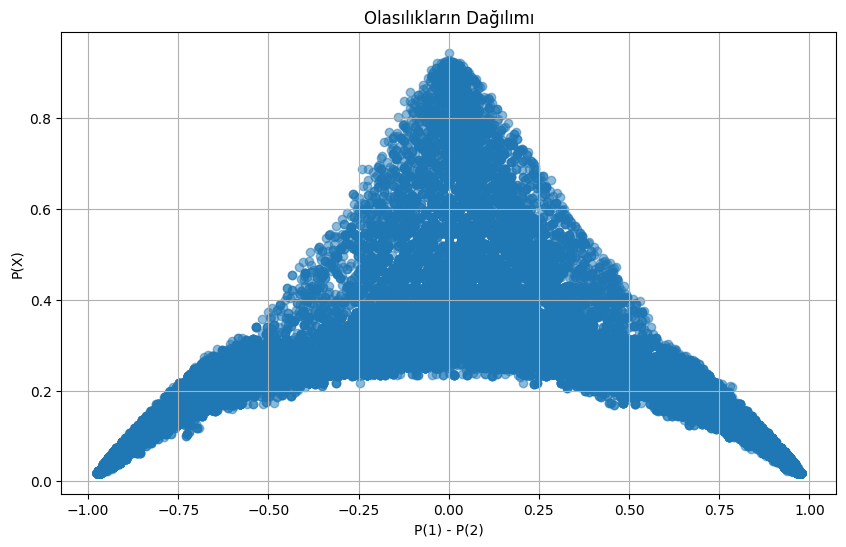

In [31]:
#1.3

data['P_diff'] = data['P_home_norm'] - data['P_away_norm']

plt.figure(figsize=(10, 6))
plt.scatter(data['P_diff'], data['P_draw_norm'], alpha=0.5)
plt.xlabel("P(1) - P(2)")
plt.ylabel("P(X)")
plt.title("Olasılıkların Dağılımı")
plt.grid()
plt.show()

In [32]:
# Bin aralıkları oluşturma (-1 ile 1 arasında)
bins = np.linspace(-1, 1, 21)
data['P_diff_bin'] = pd.cut(data['P_diff'], bins)

# Her bin için analiz
bin_analysis = data.groupby('P_diff_bin').agg(
    Berabere_Olasılığı=('result', lambda x: (x == 'X').mean()),
    Toplam_Sayı=('result', 'size'),
    Beraberlik_Sayısı=('result', lambda x: (x == 'X').sum())
).reset_index()

# Sonucu yazdırma
bin_analysis


/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/2327432483.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = data.groupby('P_diff_bin').agg(


,P_diff_bin,Berabere_Olasılığı,Toplam_Sayı,Beraberlik_Sayısı
0,"(-1.0, -0.9]",0.032928,1974,65
1,"(-0.9, -0.8]",0.121766,2242,273
2,"(-0.8, -0.7]",0.152206,2017,307
3,"(-0.7, -0.6]",0.244040,1594,389
4,"(-0.6, -0.5]",0.251451,1551,390
5,"(-0.5, -0.4]",0.335526,1520,510
6,"(-0.4, -0.3]",0.283305,1779,504
7,"(-0.3, -0.2]",0.346589,2389,828
8,"(-0.2, -0.1]",0.373731,3251,1215
9,"(-0.1, 0.0]",0.396396,3996,1584


/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/430377102.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  first_half_bin_analysis = first_half_data.groupby('P_diff_bin')['result'].apply(
/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/430377102.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  second_half_bin_analysis = second_half_data.groupby('P_diff_bin')['result'].apply(


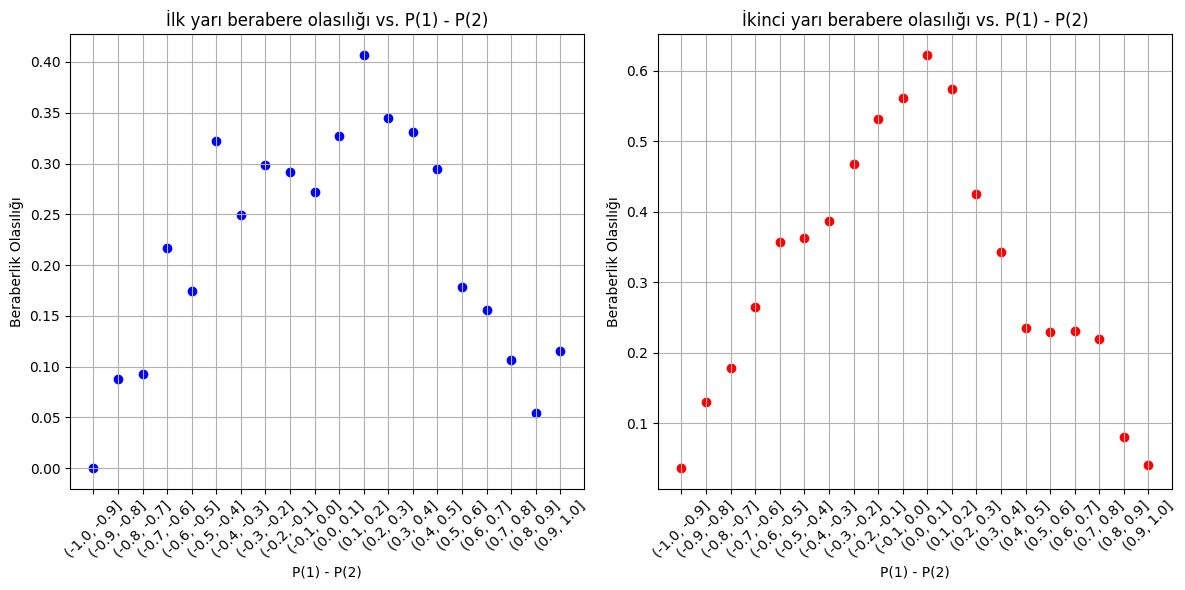

In [33]:
first_half_data = data[data['halftime'] == '1st-half']
first_half_bin_analysis = first_half_data.groupby('P_diff_bin')['result'].apply(
    lambda x: (x == 'X').mean()
).reset_index()
first_half_bin_analysis.columns = ['Bin', 'Draw_Probability']

second_half_data = data[data['halftime'] == '2nd-half']
second_half_bin_analysis = second_half_data.groupby('P_diff_bin')['result'].apply(
    lambda x: (x == 'X').mean()
).reset_index()
second_half_bin_analysis.columns = ['Bin', 'Draw_Probability']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(first_half_bin_analysis['Bin'].astype(str), first_half_bin_analysis['Draw_Probability'], color='blue')
plt.title("İlk yarı berabere olasılığı vs. P(1) - P(2)")
plt.xlabel("P(1) - P(2)")
plt.ylabel("Beraberlik Olasılığı")
plt.xticks(rotation=45)
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(second_half_bin_analysis['Bin'].astype(str), second_half_bin_analysis['Draw_Probability'], color='red')
plt.title("İkinci yarı berabere olasılığı vs. P(1) - P(2)")
plt.xlabel("P(1) - P(2)")
plt.ylabel("Beraberlik Olasılığı")
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()


İlk assignment'taki farklara baktığımız zaman verilerde ufak da olsa bir bias olduğunu görmek mümkün. İlk yarıdaki duruma baktığımız zaman ev sahibinin kazanma olasılığının daha düşük olduğu durumlarda, deplasmanın kazanma olasılığının daha düşük olduğu durumlara göre beraberliğe daha yatkın olduğunu görüyoruz. Bunun en temel nedeninin ev sahibinin kendi stadında maç yapması olduğunu düşünüyorum. İddiada da muhtemelen ev sahibinin bu avantaj nedeniyle mağlubiyetini beraberliğe çevirme olasılığı daha yüksek oluyor.

İkinci yarıya ve ilk yarıya baktığımızda ise ikinci yarının ilk yarıya göre daha düzgün bir şekil gösterdiğini görüyoruz. Bunun nedeniyse ikinci yarıdaki sürenin gittikçe azalmış olmasıdır. Bu nedenle hem ev sahibinin hem de deplasman takımlarının olasılığının düştükçe beraberlik ihtimalinin de düştüğünü görüyoruz. Bunun nedeniyse süre azalmış oluyor ve hangi olasılık daha öndeyse onun gerçekleşme ihtimali gitgide daha fazla artıyor.

In [9]:
#2

# Late Goal çıkarma
late_goal_games = data[(data['minute'] > 45) & (data['halftime'] == '2nd-half')]


# Birleştirme
matches_to_remove = pd.concat([late_goal_games['fixture_id']]).unique()

# Filtreleme
filtered_data_late = data[~data['fixture_id'].isin(matches_to_remove)]

# Her case için yazdırma
removed_late_goal_count = len(late_goal_games)

print(f"Geç gelen goller nedeniyle çıkarılmış satır sayısı: {removed_late_goal_count}")



Geç gelen goller nedeniyle çıkarılmış satır sayısı: 1886


/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/3120938734.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_late['P_home'] = 1 / filtered_data_late['1']
/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/3120938734.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_late['P_draw'] = 1 / filtered_data_late['X']
/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/3120938734.py:6: SettingWithCopyWarning: 
A value is trying to be set on a c

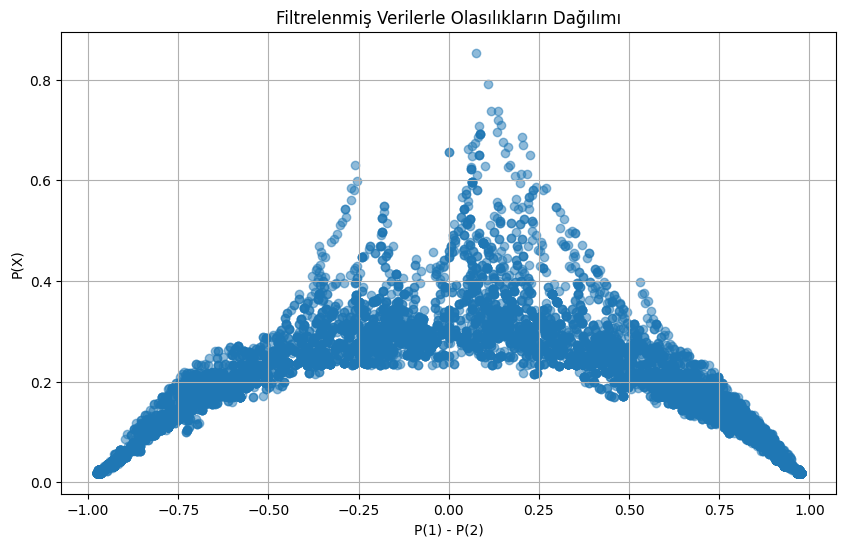

In [10]:
# Gürültülü verilerden filtrelenen verilerle görev 1 adımlarını yeniden uygulayalım

# Olasılıkların yeniden hesaplanması
filtered_data_late['P_home'] = 1 / filtered_data_late['1']
filtered_data_late['P_draw'] = 1 / filtered_data_late['X']
filtered_data_late['P_away'] = 1 / filtered_data_late['2']

# Normalize edilmiş olasılıkların hesaplanması
filtered_data_late['P_sum'] = filtered_data_late['P_home'] + filtered_data_late['P_draw'] + filtered_data_late['P_away']
filtered_data_late['P_home_norm'] = filtered_data_late['P_home'] / filtered_data_late['P_sum']
filtered_data_late['P_draw_norm'] = filtered_data_late['P_draw'] / filtered_data_late['P_sum']
filtered_data_late['P_away_norm'] = filtered_data_late['P_away'] / filtered_data_late['P_sum']

# P(home win) - P(away win) ve P(draw) görselleştirilmesi
filtered_data_late['P_diff'] = filtered_data_late['P_home_norm'] - filtered_data_late['P_away_norm']

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data_late['P_diff'], filtered_data_late['P_draw_norm'], alpha=0.5)
plt.xlabel("P(1) - P(2)")
plt.ylabel("P(X)")
plt.title("Filtrelenmiş Verilerle Olasılıkların Dağılımı")
plt.grid()
plt.show()


Bu tabloda doksanıncı dakikadan sonra gol olan maçları çıkardık. Bu tabloda anladığımız kadarıyla kazanma olasılıkları dar olan aralıktaki verilerin azaldığını görüyoruz. Özellikle ev sahibi takımın kazanma olasılığı daha düşükken gol olduğunu görüyoruz. Ancak her ne kadar o dakikalarda gol olsa da, bu nedenle çıkarılmış maçların hepsinin sonlara doğru beraberlik oranının ortalama 0.6 olduğunu görüyoruz. Demek ki olasılık hesabında istatistiklere rağmen beraberlik maç sonlarına doğru daha ağır basıyor.

In [11]:
# Bin aralıkları oluşturma (-1 ile 1 arasında)
bins = np.linspace(-1, 1, 21)
filtered_data_late['P_diff_bin'] = pd.cut(filtered_data_late['P_diff'], bins)

# Her bin için analiz
bin_analysis = filtered_data_late.groupby('P_diff_bin').agg(
    Berabere_Olasılığı=('result', lambda x: (x == 'X').mean()),
    Toplam_Sayı=('result', 'size'),
    Beraberlik_Sayısı=('result', lambda x: (x == 'X').sum())
).reset_index()

# Sonucu yazdırma
bin_analysis


/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/1103477592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_late['P_diff_bin'] = pd.cut(filtered_data_late['P_diff'], bins)
/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/1103477592.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = filtered_data_late.groupby('P_diff_bin').agg(


,P_diff_bin,Berabere_Olasılığı,Toplam_Sayı,Beraberlik_Sayısı
0,"(-1.0, -0.9]",0.004216,1186,5
1,"(-0.9, -0.8]",0.002430,823,2
2,"(-0.8, -0.7]",0.000000,631,0
3,"(-0.7, -0.6]",0.033138,513,17
4,"(-0.6, -0.5]",0.053419,468,25
5,"(-0.5, -0.4]",0.085526,304,26
6,"(-0.4, -0.3]",0.006276,478,3
7,"(-0.3, -0.2]",0.064833,509,33
8,"(-0.2, -0.1]",0.024911,562,14
9,"(-0.1, 0.0]",0.115385,364,42


/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/1847529315.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  first_half_bin_analysis = first_half_data.groupby('P_diff_bin')['result'].apply(
/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/1847529315.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  second_half_bin_analysis = second_half_data.groupby('P_diff_bin')['result'].apply(


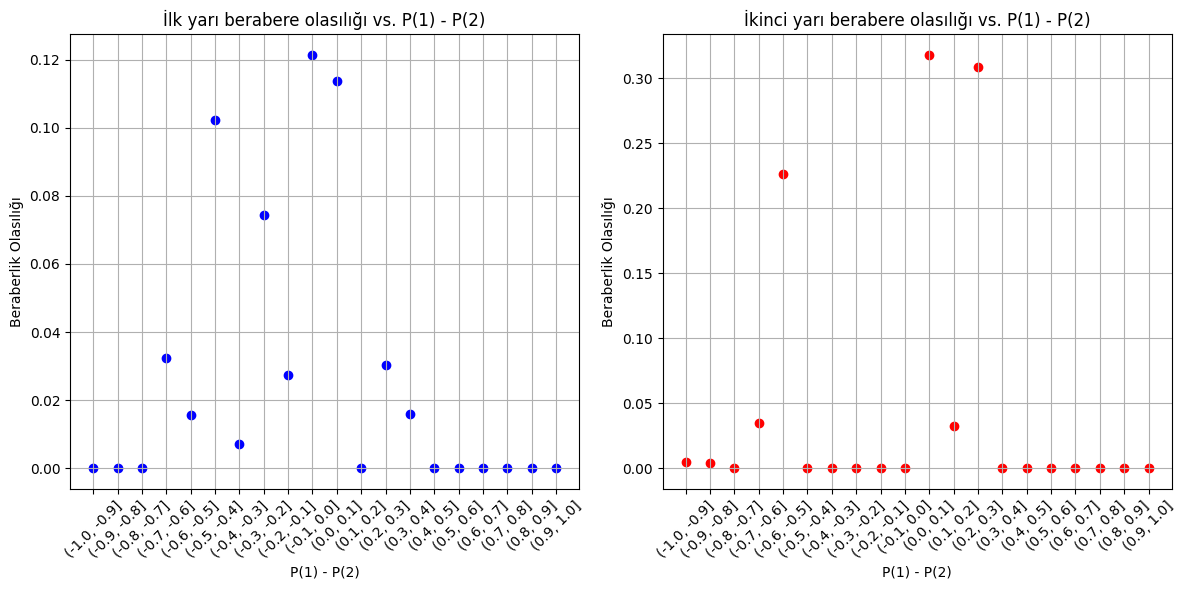

In [12]:
first_half_data = filtered_data_late[filtered_data_late['halftime'] == '1st-half']
first_half_bin_analysis = first_half_data.groupby('P_diff_bin')['result'].apply(
    lambda x: (x == 'X').mean()
).reset_index()
first_half_bin_analysis.columns = ['Bin', 'Draw_Probability']

second_half_data = filtered_data_late[filtered_data_late['halftime'] == '2nd-half']
second_half_bin_analysis = second_half_data.groupby('P_diff_bin')['result'].apply(
    lambda x: (x == 'X').mean()
).reset_index()
second_half_bin_analysis.columns = ['Bin', 'Draw_Probability']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(first_half_bin_analysis['Bin'].astype(str), first_half_bin_analysis['Draw_Probability'], color='blue')
plt.title("İlk yarı berabere olasılığı vs. P(1) - P(2)")
plt.xlabel("P(1) - P(2)")
plt.ylabel("Beraberlik Olasılığı")
plt.xticks(rotation=45)
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(second_half_bin_analysis['Bin'].astype(str), second_half_bin_analysis['Draw_Probability'], color='red')
plt.title("İkinci yarı berabere olasılığı vs. P(1) - P(2)")
plt.xlabel("P(1) - P(2)")
plt.ylabel("Beraberlik Olasılığı")
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()



Bu tabloda gördüğümüz üzere çok uç noktalardaki olasılıkların sıfır olduğunu görüyoruz. Bir üstteki tabloda iki tarafın kazanma olasılık farkları az olsa da burada en uç noktadaki olasılıkların da sıfır olduğunu görüyoruz. Bu istatistikten şunu anlıyoruz: son dakikalarda atılan gollerin hepsi beraberlik sonucunu sağlamamış olabilir. Hem ev sahibi hem de deplasman takımları öndeyken de goller olmuş olabilir. Ayrıca bu veriler maçlardan birden fazla noktaları gösteriyor. Her maç eşit olasılıkta başlıyor ve süre geçtikçe bir taraf ağır basıyor. Bu yüzden orta alandaki olasılıklar çok daha fazla veriye sahip. Uç noktalarda az veriler oldukları için de sıfır olasılık gelmiş olabilir.

In [13]:
#2

# Early Red Card çıkarma
early_red_card_games = data[(data['Redcards - home'] > 0) & (data['minute'] <= 15) |
                             (data['Redcards - away'] > 0) & (data['minute'] <= 15)]

# Birleştirme
matches_to_remove = pd.concat([early_red_card_games['fixture_id']]).unique()

# Filtreleme
filtered_data_red = data[~data['fixture_id'].isin(matches_to_remove)]

# Her case için yazdırma
removed_early_red_card_count = len(early_red_card_games)

print(f"Erken kırmızı kart nedeniyle çıkarılmış maç sayısı: {removed_early_red_card_count}")



Erken kırmızı kart nedeniyle çıkarılmış maç sayısı: 528


/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/1313387071.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_red['P_home'] = 1 / filtered_data_red['1']
/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/1313387071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_red['P_draw'] = 1 / filtered_data_red['X']
/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/1313387071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy 

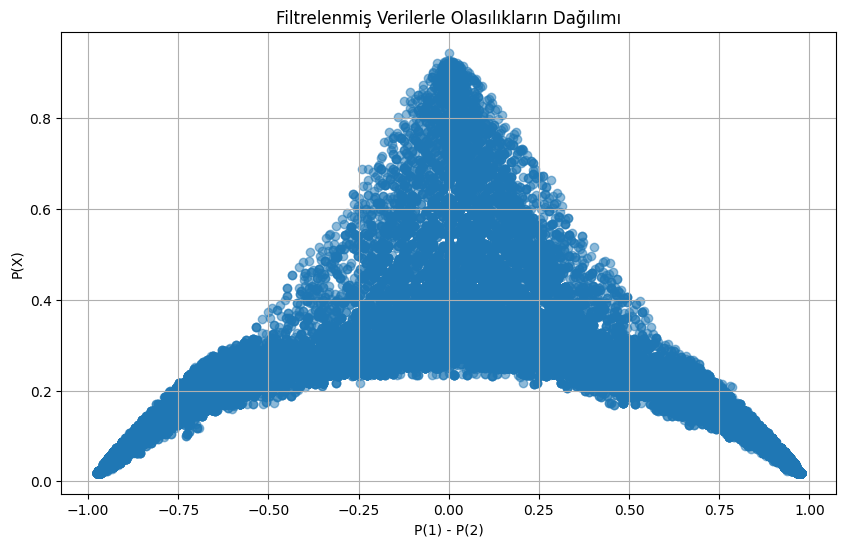

In [14]:
# Gürültülü verilerden filtrelenen verilerle görev 1 adımlarını yeniden uygulayalım

# Olasılıkların yeniden hesaplanması
filtered_data_red['P_home'] = 1 / filtered_data_red['1']
filtered_data_red['P_draw'] = 1 / filtered_data_red['X']
filtered_data_red['P_away'] = 1 / filtered_data_red['2']

# Normalize edilmiş olasılıkların hesaplanması
filtered_data_red['P_sum'] = filtered_data_red['P_home'] + filtered_data_red['P_draw'] + filtered_data_red['P_away']
filtered_data_red['P_home_norm'] = filtered_data_red['P_home'] / filtered_data_red['P_sum']
filtered_data_red['P_draw_norm'] = filtered_data_red['P_draw'] / filtered_data_red['P_sum']
filtered_data_red['P_away_norm'] = filtered_data_red['P_away'] / filtered_data_red['P_sum']

# P(home win) - P(away win) ve P(draw) görselleştirilmesi
filtered_data_red['P_diff'] = filtered_data_red['P_home_norm'] - filtered_data_red['P_away_norm']

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data_red['P_diff'], filtered_data_red['P_draw_norm'], alpha=0.5)
plt.xlabel("P(1) - P(2)")
plt.ylabel("P(X)")
plt.title("Filtrelenmiş Verilerle Olasılıkların Dağılımı")
plt.grid()
plt.show()


Bu tabloda on beşinci dakikadan önce kırmızı kart olan maçları çıkartıyoruz. Bunun nedeniyle çıkarılmış maç sayısı, son dakikada gol olan maç sayısına göre daha az. Ayrıca 15. dakikadan sonra bir takım eksik kaldığı için beraberlik olasılığı çok düşmektedir. Bu yüzden ortalarda çok veri kaybı olmaz, uç noktalarda veri kayıpları olmaktadır.

In [15]:
# Bin aralıkları oluşturma (-1 ile 1 arasında)
bins = np.linspace(-1, 1, 21)
filtered_data_red['P_diff_bin'] = pd.cut(filtered_data_red['P_diff'], bins)

# Her bin için analiz
bin_analysis = filtered_data_red.groupby('P_diff_bin').agg(
    Berabere_Olasılığı=('result', lambda x: (x == 'X').mean()),
    Toplam_Sayı=('result', 'size'),
    Beraberlik_Sayısı=('result', lambda x: (x == 'X').sum())
).reset_index()

# Sonucu yazdırma
bin_analysis


/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/1788763278.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_red['P_diff_bin'] = pd.cut(filtered_data_red['P_diff'], bins)
/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/1788763278.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = filtered_data_red.groupby('P_diff_bin').agg(


,P_diff_bin,Berabere_Olasılığı,Toplam_Sayı,Beraberlik_Sayısı
0,"(-1.0, -0.9]",0.035655,1795,64
1,"(-0.9, -0.8]",0.136890,1987,272
2,"(-0.8, -0.7]",0.159597,1886,301
3,"(-0.7, -0.6]",0.256513,1497,384
4,"(-0.6, -0.5]",0.252212,1356,342
5,"(-0.5, -0.4]",0.312950,1390,435
6,"(-0.4, -0.3]",0.285012,1628,464
7,"(-0.3, -0.2]",0.361124,2207,797
8,"(-0.2, -0.1]",0.379421,3110,1180
9,"(-0.1, 0.0]",0.388339,3739,1452


/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/3276112922.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  first_half_bin_analysis = first_half_data.groupby('P_diff_bin')['result'].apply(
/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/3276112922.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  second_half_bin_analysis = second_half_data.groupby('P_diff_bin')['result'].apply(


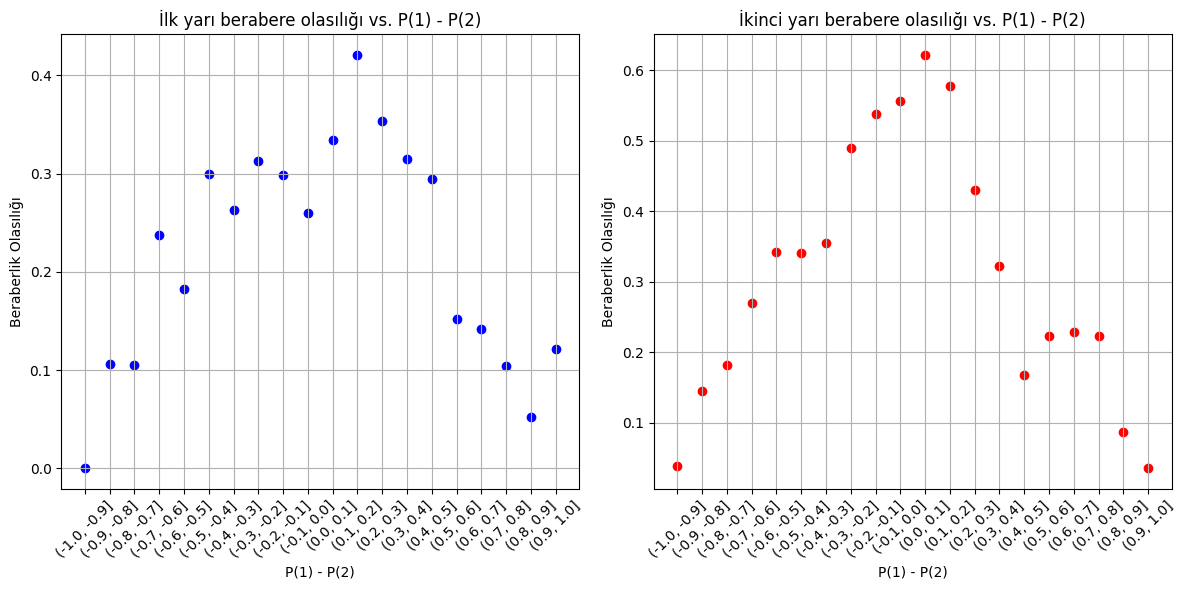

In [16]:
first_half_data = filtered_data_red[filtered_data_red['halftime'] == '1st-half']
first_half_bin_analysis = first_half_data.groupby('P_diff_bin')['result'].apply(
    lambda x: (x == 'X').mean()
).reset_index()
first_half_bin_analysis.columns = ['Bin', 'Draw_Probability']

second_half_data = filtered_data_red[filtered_data_red['halftime'] == '2nd-half']
second_half_bin_analysis = second_half_data.groupby('P_diff_bin')['result'].apply(
    lambda x: (x == 'X').mean()
).reset_index()
second_half_bin_analysis.columns = ['Bin', 'Draw_Probability']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(first_half_bin_analysis['Bin'].astype(str), first_half_bin_analysis['Draw_Probability'], color='blue')
plt.title("İlk yarı berabere olasılığı vs. P(1) - P(2)")
plt.xlabel("P(1) - P(2)")
plt.ylabel("Beraberlik Olasılığı")
plt.xticks(rotation=45)
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(second_half_bin_analysis['Bin'].astype(str), second_half_bin_analysis['Draw_Probability'], color='red')
plt.title("İkinci yarı berabere olasılığı vs. P(1) - P(2)")
plt.xlabel("P(1) - P(2)")
plt.ylabel("Beraberlik Olasılığı")
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()



Çok maç verisi silmemiş olsak da beraberlik olasılık dağılımlarının uç noktada daha yukarıya çıktığını görüyoruz. Bunun en temel nedeni uç noktalardaki eksik oyuncu nedeniyle artan galibiyet olasılıklarının elenmiş olması. Bu elenme olduğu için kenar bölgelerdeki beraberlik olasılıklarının biraz daha yukarıda olduğunu görüyoruz. Zaten üstteki tabloya bakarsak, beraberlik oranlarının köşelerde neredeyse hiç silinmediğini görmekteyiz. Bu yüzden kırmızı kart sayısı nedeniyle çıkan maç sayısı az ancak binlerdeki beraberlik oranını da artırdığı kesindir.

Index(['fixture_id', 'halftime', 'current_time', 'half_start_datetime',
       'match_start_datetime', 'minute', 'second', 'latest_bookmaker_update',
       'suspended', 'stopped',
       ...
       'result', 'P_home', 'P_draw', 'P_away', 'P_sum', 'P_home_norm',
       'P_draw_norm', 'P_away_norm', 'P_diff', 'P_diff_bin'],
      dtype='object', length=115)
Accuracy: 95.74%


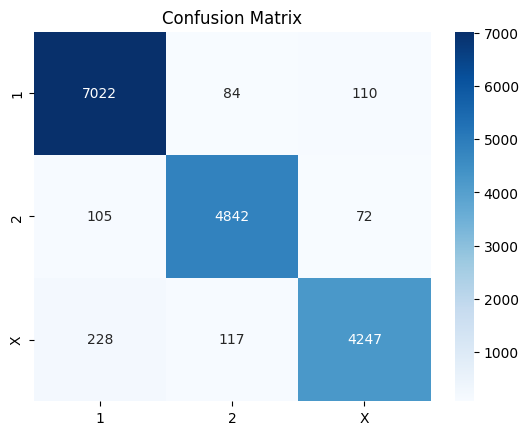

In [17]:
print(data.columns)

# Label Encoding
label_encoder = LabelEncoder()

# 'Interval' hatası almamak için transform'a fit ediyoruz
data['halftime'] = label_encoder.fit_transform(data['halftime'].astype(str))
data['result'] = label_encoder.fit_transform(data['result'].astype(str))
data['current_state'] = label_encoder.fit_transform(data['current_state'].astype(str))

# Gerek olmayan satırlar ve sonucu söyleyen satırlar drop'lanıyor
columns_to_drop = ['result', 'current_time', 'half_start_datetime', 'match_start_datetime', 
                   'latest_bookmaker_update', 'suspended', 'stopped','ticking','final_score','name','P_diff_bin']

columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Feature seçimi
X = data.drop(columns=columns_to_drop) 
y = data['result']  # 'result' sütunu hedef

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=20)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.show()


Yanlış sınıflandırmaların özet tablosu:
     halftime  minute  true_label  predicted_label  error_count
0           0       0           0                2            3
1           0       0           1                0            2
2           0       0           1                2            1
3           0       0           2                0            1
4           0       1           0                1            2
..        ...     ...         ...              ...          ...
367         1      51           2                1            2
368         1      52           2                1            1
369         1      53           2                0            1
370         1      53           2                1            1
371         1      56           1                0            1

[372 rows x 5 columns]


/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/4167673992.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['true_label'] = y_test.iloc[misclassified_indices].values
/var/folders/ys/74vbprgx5wb7ggv44nbd6f240000gn/T/ipykernel_2739/4167673992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified_samples['predicted_label'] = y_pred[misclassified_indices]


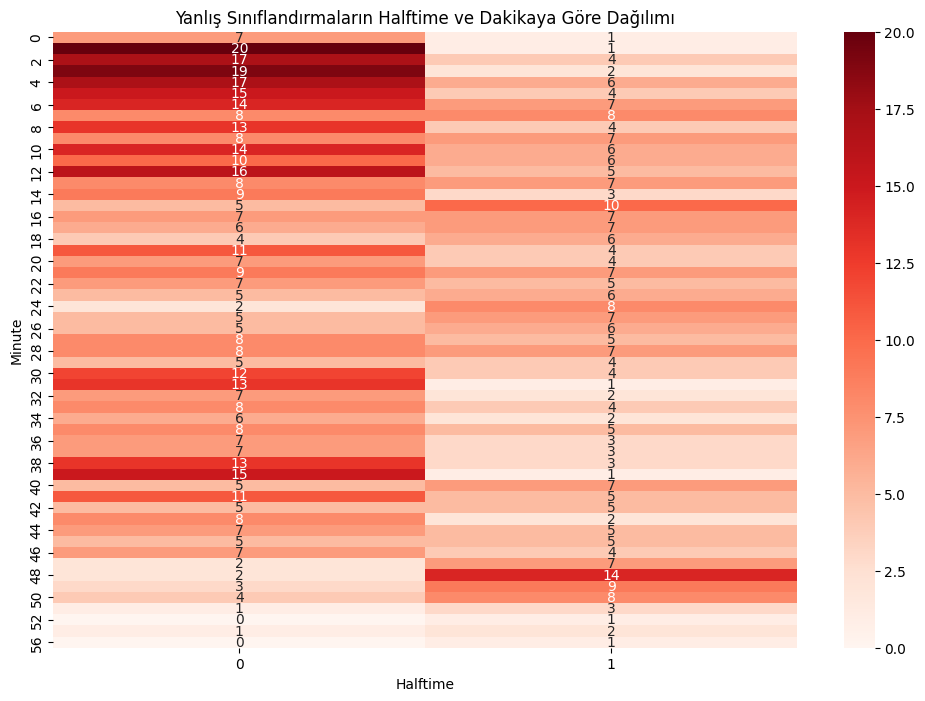

In [18]:
# Confusion Matrix'in yanlış sınıflandırılan satırlarını analiz etmek için:
# Yanlış sınıflandırılan indeksleri bul
misclassified_indices = np.where(y_test != y_pred)[0]

# Test verilerindeki yanlış sınıflandırılan satırları seç
misclassified_samples = X_test.iloc[misclassified_indices]
misclassified_samples['true_label'] = y_test.iloc[misclassified_indices].values
misclassified_samples['predicted_label'] = y_pred[misclassified_indices]

# Yanlış tahmin edilen zaman bilgilerini seç (minute ve halftime)
time_analysis = misclassified_samples[['minute', 'halftime', 'true_label', 'predicted_label']]

# Halftime ve dakika bazında toplam hata sayısını ve true label - predicted label kombinasyonlarını gruplama
error_summary = time_analysis.groupby(['halftime', 'minute', 'true_label', 'predicted_label']).size().reset_index(name='error_count')

# Yanlış sınıflandırılan tabloyu yazdır
print("Yanlış sınıflandırmaların özet tablosu:")
print(error_summary)

# Hangi zaman dilimlerinde daha fazla hata yapıldığını analiz etmek için bir grafik çizebiliriz
plt.figure(figsize=(12, 8))
sns.heatmap(
    error_summary.pivot_table(index='minute', columns='halftime', values='error_count', aggfunc='sum', fill_value=0),
    annot=True, fmt='d', cmap='Reds'
)
plt.title('Yanlış Sınıflandırmaların Halftime ve Dakikaya Göre Dağılımı')
plt.xlabel('Halftime')
plt.ylabel('Minute')
plt.show()

Tree modelimiz sayesinde nereyse %96'lık doğru sonuç elde ettik. Confusion matrix'tense hangi dakikalarda hata yaptığımıza bakmak daha doğru olacaktır. Doğal olarak baktığımız bu analizde dakika sayısı azaldıkça modelimizin yanıldığı maç sayısı artıyor. Bunun nedeni ilk dakikalarda neredeyse hiç istatistik olmadığı için modelimiz bunları beraberlik veya oranlara göre favoriye maçı vermiş olmasından kaynaklıdır. Bunun haricinde ikinci yarıdaki son dakikalarda da hatalı sayı biraz yüksek. Bunun nedeninin de son dakikalardaki goller olduğunu tahmin edebiliriz. Son dakikalardaki goller geniş bir aralık sunmaktadır ve bu yüzden maç sonuçlarını değiştirmektedir.

In [19]:
# Featur Importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
})

# Importance Sıralaması
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)


                  Feature  Importance
103                P_diff    0.196319
0              fixture_id    0.087413
98                 P_away    0.077266
9          Assists - away    0.061772
10         Assists - home    0.056957
..                    ...         ...
1                halftime    0.000000
56        Redcards - home    0.000000
59    Score Change - away    0.000000
60    Score Change - home    0.000000
74   Substitutions - home    0.000000

[104 rows x 2 columns]


Feature olarak üst sıralarda olasılık farkları ve deplasman olasılığının olması doğaldır çünkü daha önce de söylediğim gibi galibiyet oynayan takıma karşı bir bias vardır ve eğer deplasman takımı biraz daha iyi oynarsa ona göre kendi tarafına maçı getirebilir. Ayrıca fikstüre göre önem verilmesi de doğrudur çünkü her maçın olayları farklı gelişir. Son olarak modelin gollerden ziyade asistlere bakmasını da çok sevdim çünkü futbol bir takım oyunudur. Bireysel yetenekle ve penaltıyla da goller atabilirsin ama genellikle asistle atılan goller takım planının iyi işlediğini gösterir. Bu yüzden kazanacak tarafa pay vermesi doğrudur.

In [20]:
# Predicted Probs
y_prob = clf.predict_proba(X_test)

In [21]:
predicted_home_prob = y_prob[:, label_encoder.transform(['1'])[0]]
predicted_away_prob = y_prob[:, label_encoder.transform(['2'])[0]]
predicted_draw_prob = y_prob[:, label_encoder.transform(['X'])[0]]

In [22]:
# Gerçek ve tahmin edilen olasılıkların ortalamalarını hesaplayalım
mean_home = data['P_home'].mean()
mean_draw = data['P_draw'].mean()
mean_away = data['P_away'].mean()

mean_pred_home = predicted_home_prob.mean()
mean_pred_draw = predicted_draw_prob.mean()
mean_pred_away = predicted_away_prob.mean()

# Gerçek ve tahmin edilen olasılıkların ortalamaları arasındaki hata oranlarını hesaplayalım
home_error = np.abs(mean_home - mean_pred_home)
draw_error = np.abs(mean_draw - mean_pred_draw)
away_error = np.abs(mean_away - mean_pred_away)

# Sonuçları yazdıralım
print(f"Gerçek Home Olasılığı Ortalaması: {mean_home:.4f}")
print(f"Tahmin Edilen Home Olasılığı Ortalaması: {mean_pred_home:.4f}")
print(f"Home Hata Oranı: {home_error:.4f}\n")

print(f"Gerçek Draw Olasılığı Ortalaması: {mean_draw:.4f}")
print(f"Tahmin Edilen Draw Olasılığı Ortalaması: {mean_pred_draw:.4f}")
print(f"Draw Hata Oranı: {draw_error:.4f}\n")

print(f"Gerçek Away Olasılığı Ortalaması: {mean_away:.4f}")
print(f"Tahmin Edilen Away Olasılığı Ortalaması: {mean_pred_away:.4f}")
print(f"Away Hata Oranı: {away_error:.4f}")

Gerçek Home Olasılığı Ortalaması: 0.4495
Tahmin Edilen Home Olasılığı Ortalaması: 0.4291
Home Hata Oranı: 0.0204

Gerçek Draw Olasılığı Ortalaması: 0.2821
Tahmin Edilen Draw Olasılığı Ortalaması: 0.2713
Draw Hata Oranı: 0.0109

Gerçek Away Olasılığı Ortalaması: 0.3314
Tahmin Edilen Away Olasılığı Ortalaması: 0.2996
Away Hata Oranı: 0.0318


Olasılık ortalamalarının hata oranı da çok düşük geliyor, tıpkı accuracy gibi